# Can we make a change on climate change?
#### EPA1333 Final Assignment
### Introduction
Regardless of the many debates over the impact of humans on climate change, global warming is an observable fact. According to NASA, highest 16 global temperatures have been recorded since 2001, the arctic ice shrank to a minimum in 2012, and carbon dioxide levels in the air are higher than ever!

Data analysis can help us better understand how the climate has changed, why, to make predictions for the future years, and to evaluate measures on how to suppress these changes. In this assignment you receive climate change data from World Bank, and are expected to perform an original and non-trivial analysis using Python.

### Data

#### Climate change indicators
The climate change data offered by World Bank contains a large set of indicators, such as for example CO2 emissions, population growth or renewable energy output. Values of these indicators are available per country and per year. You can download the data in *.csv format from https://data.worldbank.org/topic/climate-change.

In [2]:
# import standard library
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load world bank data
# skip the unneeded header
wb = pd.read_csv('world_bank/API_19_DS2_en_csv_v2.csv', sep=',', header=0, skiprows=3) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb = wb.drop(wb.columns[[61]], 1)

# display the head of dataframe
wb.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929


In [4]:
#load country metadata
wb_meta_country = pd.read_csv('world_bank/Metadata_Country_API_19_DS2_en_csv_v2.csv', sep=',', header=0) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb_meta_country = wb_meta_country.drop(wb_meta_country.columns[[5]], 1)

# display the head of dataframe
wb_meta_country.head()


,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra


In [5]:
#load indicator metadata
wb_meta_indi = pd.read_csv('world_bank/Metadata_Indicator_API_19_DS2_en_csv_v2.csv', sep=',', header=0) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb_meta_indi = wb_meta_indi.drop(wb_meta_indi.columns[[4]], 1)

# display the head of dataframe
wb_meta_indi.head()


,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
0,SP.URB.TOTL.IN.ZS,Urban population (% of total),Urban population refers to people living in ur...,The United Nations Population Divisions World ...
1,SP.URB.TOTL,Urban population,Urban population refers to people living in ur...,World Bank Staff estimates based on United Nat...
2,SP.URB.GROW,Urban population growth (annual %),Urban population refers to people living in ur...,World Bank Staff estimates based on United Nat...
3,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
4,SP.POP.GROW,Population growth (annual %),Annual population growth rate for year t is th...,Derived from total population. Population sour...


#### Climate data API
The Climate Data API provides programmatic access to most of the climate data used on the World Bank’s Climate Change Knowledge Portal. You can access this data directly from Python using requests. In addition to what was already downloadable as csv data, with this API you are able to access temperature, precipitation and basin level data. Read about it in more detail here: https://datahelpdesk.worldbank.org/knowledgebase/articles/902061-climate-data-api

Below is an example of how to access yearly temperature historical data per country from Python. You can select a country using its ISO aplha3 code: https://unstats.un.org/unsd/methodology/m49/.


In [6]:
import requests
r = requests.get('http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/ROU')
rou = r.json()
rou[:5]

[{'data': 9.215595, 'year': 1901},
 {'data': 8.389345, 'year': 1902},
 {'data': 9.500536, 'year': 1903},
 {'data': 8.901487, 'year': 1904},
 {'data': 9.12619, 'year': 1905}]

As with most data sources, you might find that you data contains missing values. Please handle them appropriately, for example by using interpolation.

#### Other resources
You are encouraged to find more data sources that will make your analysis more meaningful. Please make sure that you document everything carefully. Only use freely available datasets.

#### Assignment
* Create a Jupyter Notebook that contains your explanations and analyses.
* Start the notebook with a clear description of the type of analysis you are going to perform.
* The conceptual contents of the Notebook should be roughly similar to a normal written report of 10-20 pages.
* Some (minimum) properties of the Notebook and your analyses on which we will grade:
    * Required: Combine different data from multiple sources in your analyses.
    * Required: Use multiple types of visualizations of your results.
    * Required: Make sure your Notebook does not generate errors!
    * Required: You should use Python to answer your research questions. Your code should read, clean and format, process and visualize the data. There should be at least some non-trivial processing involved.
    * Whenever possible, make your Notebook read the data directly from the web. This way, your notebook will always use the most up-to-date data available. If not, document carefully where the data was collected what to do when you want to use more up-to-date data.
    * Demonstrate your skills in Python by using typical Python constructs and using the appropriate data structures (lists, dictionaries, tuples, arrays, dataframes, series, recursion, etc.)
    * Write clear, understandable code:
        * Document your code! Put comments when necessary.
        * Use sensible variable names.
        * Break up your code into parts. Use (fruitful) functions.
    * Try to think of reusability of your code. How easy would it be to use your same code if we want to try to do a small variations of your analysis? Can we easily adapt/play around with your code?
    * How difficult were your analyses?
* Make your Notebook self-explanatory. So, it should contain text (with references) as well as your actual analysis code and results.
* If you want to use other libraries for your analyses or visualizations, feel free to do so. However, only use free available and well-known libraries. The ones that come standard with Anaconda are fine. If you want to use something else, that you first need to install, check with us first.
* Create a zip archive and upload it on Brightspace.

#### Example
Here are some example questions you might ask to start the analysis. Please note that this is just an example and that you are expected to come up with your own questions and analyses.
* The EU has the following goal in the Paris agreement: "At least a 40% domestic reduction in greenhouse gases by 2030 compared to 1990 levels.” How is the EU doing at the moment? If they don’t change policy (i.e extrapolation of current trends) where will they end up? [source]
* Can you classify in good/neutral/bad countries?
* What is the trend per continent with respect to gas emissions? How do countries within the same continent behave? Is it fair to make statements over whole continents?
* Where do you find the highest increase in temperatures compared to 1960?
* Suppose that each country has a % growth or reduction of CO2, where do we end up?
* What are the countries with most gas emissions? How does that change when you normalize by their size / population?
* What is the country with the best trend in renewable energy over the last 10 years?

In [7]:
# load label Climate Change Performance Index
# the data were extracted from https://germanwatch.org/en/download/16484.pdf
country_class_y = pd.read_csv('world_bank/CCPI_2017.csv', sep=',', header=0) 
country_class_y.head()

,Countries,Label
0,France,Good
1,Sweden,Good
2,United Kingdom,Good
3,Cyprus,Good
4,Luxembourg,Good


In [8]:
# create a df of countries in CCPI results
df = pd.DataFrame()
for country in country_class_y['Countries']:
    # filter the CCPI countries
    df1 = wb[wb['Country Name'] == country]
    # append to the df
    df = pd.concat( [df,df1], ignore_index=True, axis=0)

In [9]:
print(df.shape)
print(df1.shape)
# check the number of the countries
df.shape[0] / df1.shape[0]

(4480, 61)
(80, 61)


56.0

In [10]:
# rename the CCPI column to Country Name, so it could be 'merge' on this column name
country_class_y.columns = ['Country Name', 'Label']
country_class_y.head()
label_int = country_class_y['Label'].map({'Good':2, 'Neutral':1, 'Bad':0})

In [11]:
years = list(df.columns[49:61])
years

['2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016']

In [40]:
temp_column = df.columns.values[range(4,61)]
df_gilaks = pd.DataFrame()
df_gilaks = wb[temp_column]
df_gilaks.columns = range(0,57)
df_gilaks.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,50.654000,50.639000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,29253.000000,29416.000000,29575.000000,29738.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,0.586271,0.555661,0.539067,0.549628,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,57715.000000,58055.000000,58386.000000,58726.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929


In [41]:
type(df_gilaks.columns.values[6])

numpy.int64

In [46]:
df_gilaks.shape

(21120, 57)

In [47]:
21120/80

264.0

In [42]:
df_gilaks

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,50.654000,50.639000,...,4.414700e+01,4.378300e+01,4.342100e+01,4.305900e+01,4.269800e+01,4.236400e+01,4.205800e+01,4.177900e+01,41.528000,41.304000
1,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,29253.000000,29416.000000,29575.000000,29738.000000,...,4.468600e+04,4.437500e+04,4.405200e+04,4.377800e+04,4.357500e+04,4.345600e+04,4.339800e+04,4.336500e+04,43331.000000,43296.000000
2,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,0.586271,0.555661,0.539067,0.549628,...,-4.354289e-01,-6.984006e-01,-7.305493e-01,-6.239346e-01,-4.647817e-01,-2.734659e-01,-1.335575e-01,-7.606930e-02,-0.078435,-0.080806
3,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,57715.000000,58055.000000,58386.000000,58726.000000,...,1.012200e+05,1.013530e+05,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,104341.000000,104822.000000
4,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,...,3.840600e-01,1.313107e-01,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,0.524658,0.459929
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.790000e+01,9.780000e+01,9.780000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,97.700000,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.650000e+01,9.680000e+01,9.710000e+01,9.740000e+01,9.780000e+01,9.810000e+01,9.810000e+01,9.810000e+01,98.100000,NaN


In [43]:
df_gilaks_interpolated = df_gilaks.interpolate(method='krogh',limit_direction='both',axis=1)
df_gilaks_interpolated.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,50.654000,50.639000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,29253.000000,29416.000000,29575.000000,29738.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,0.586271,0.555661,0.539067,0.549628,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,57715.000000,58055.000000,58386.000000,58726.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929


In [44]:
df_gilaks_interpolated

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,5.077600e+01,5.076100e+01,5.074600e+01,5.073000e+01,5.071500e+01,5.070000e+01,5.068500e+01,5.067000e+01,5.065400e+01,5.063900e+01,...,4.414700e+01,4.378300e+01,4.342100e+01,4.305900e+01,4.269800e+01,4.236400e+01,4.205800e+01,4.177900e+01,4.152800e+01,4.130400e+01
1,2.752600e+04,2.814100e+04,2.853200e+04,2.876100e+04,2.892400e+04,2.908200e+04,2.925300e+04,2.941600e+04,2.957500e+04,2.973800e+04,...,4.468600e+04,4.437500e+04,4.405200e+04,4.377800e+04,4.357500e+04,4.345600e+04,4.339800e+04,4.336500e+04,4.333100e+04,4.329600e+04
2,3.117931e+00,2.209658e+00,1.379868e+00,7.994038e-01,5.651398e-01,5.447726e-01,5.862706e-01,5.556611e-01,5.390666e-01,5.496279e-01,...,-4.354289e-01,-6.984006e-01,-7.305493e-01,-6.239346e-01,-4.647817e-01,-2.734659e-01,-1.335575e-01,-7.606930e-02,-7.843500e-02,-8.080622e-02
3,5.421100e+04,5.543800e+04,5.622500e+04,5.669500e+04,5.703200e+04,5.736000e+04,5.771500e+04,5.805500e+04,5.838600e+04,5.872600e+04,...,1.012200e+05,1.013530e+05,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05
4,3.148037e+00,2.238144e+00,1.409622e+00,8.324526e-01,5.926490e-01,5.734682e-01,6.169909e-01,5.873732e-01,5.685298e-01,5.806424e-01,...,3.840600e-01,1.313107e-01,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,5.246582e-01,4.599292e-01
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.636205e+20,4.671991e+20,2.487142e+20,1.301754e+20,6.692089e+19,3.375478e+19,1.668555e+19,8.072689e+18,3.817251e+18,1.761383e+18,...,9.790000e+01,9.780000e+01,9.780000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,-4.966768e+05
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.072318e+20,4.899905e+20,2.604023e+20,1.360496e+20,6.981012e+19,3.514317e+19,1.733618e+19,8.369380e+18,3.948566e+18,1.817623e+18,...,9.650000e+01,9.680000e+01,9.710000e+01,9.740000e+01,9.780000e+01,9.810000e+01,9.810000e+01,9.810000e+01,9.810000e+01,-8.161121e+05


In [48]:
wb[list(df.columns.values[range(4,61)])] = df_gilaks_interpolated[list(range(0,57))]

In [49]:
wb

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,5.077600e+01,5.076100e+01,5.074600e+01,5.073000e+01,5.071500e+01,5.070000e+01,...,4.414700e+01,4.378300e+01,4.342100e+01,4.305900e+01,4.269800e+01,4.236400e+01,4.205800e+01,4.177900e+01,4.152800e+01,4.130400e+01
1,Aruba,ABW,Urban population,SP.URB.TOTL,2.752600e+04,2.814100e+04,2.853200e+04,2.876100e+04,2.892400e+04,2.908200e+04,...,4.468600e+04,4.437500e+04,4.405200e+04,4.377800e+04,4.357500e+04,4.345600e+04,4.339800e+04,4.336500e+04,4.333100e+04,4.329600e+04
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931e+00,2.209658e+00,1.379868e+00,7.994038e-01,5.651398e-01,5.447726e-01,...,-4.354289e-01,-6.984006e-01,-7.305493e-01,-6.239346e-01,-4.647817e-01,-2.734659e-01,-1.335575e-01,-7.606930e-02,-7.843500e-02,-8.080622e-02
3,Aruba,ABW,"Population, total",SP.POP.TOTL,5.421100e+04,5.543800e+04,5.622500e+04,5.669500e+04,5.703200e+04,5.736000e+04,...,1.012200e+05,1.013530e+05,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037e+00,2.238144e+00,1.409622e+00,8.324526e-01,5.926490e-01,5.734682e-01,...,3.840600e-01,1.313107e-01,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,5.246582e-01,4.599292e-01
5,Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aruba,ABW,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aruba,ABW,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,8.636205e+20,4.671991e+20,2.487142e+20,1.301754e+20,6.692089e+19,3.375478e+19,...,9.790000e+01,9.780000e+01,9.780000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,-4.966768e+05
8,Aruba,ABW,"Community health workers (per 1,000 people)",SH.MED.CMHW.P3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Aruba,ABW,Improved water source (% of population with ac...,SH.H2O.SAFE.ZS,9.072318e+20,4.899905e+20,2.604023e+20,1.360496e+20,6.981012e+19,3.514317e+19,...,9.650000e+01,9.680000e+01,9.710000e+01,9.740000e+01,9.780000e+01,9.810000e+01,9.810000e+01,9.810000e+01,9.810000e+01,-8.161121e+05


In [50]:
wb.shape

(21120, 61)

In [55]:
# store as a dictionary: data of CCPI country for each year in one dataframe

dict_df_years = {}
for year in years:
    dict_df_years[year] = df[['Country Name','Indicator Name',year]]
    dict_df_years[year] = pd.merge(dict_df_years[year], country_class_y, on="Country Name", how="outer" )
    
dict_df_years[year].head()

,Country Name,Indicator Name,2016,Label
0,France,Urban population (% of total),7.975000e+01,Good
1,France,Urban population,5.334965e+07,Good
2,France,Urban population growth (annual %),6.963089e-01,Good
3,France,"Population, total",6.689611e+07,Good
4,France,Population growth (annual %),4.074910e-01,Good


In [56]:
# the number of features of each country
len(wb_meta_indi['INDICATOR_NAME'])

80

In [57]:
# imputation of the data, filling missing value
# we will still have an indicator with NaN value in one category, because the value is NaN for each country
# fillna.mean will not really work
# at the end we will end up deleted these unnecessary category

list_deleted_indi = {}
list_saved_indi = {}
df_test = {}

for year in years:
    list_deleted_indi[year] = []
    list_saved_indi[year] = []
    df_test[year] = pd.DataFrame()

    for label in country_class_y['Label'].unique():
        for indicator in wb_meta_indi['INDICATOR_NAME']:
            df_temp = pd.DataFrame()
            df_temp = dict_df_years[year][(dict_df_years[year]['Indicator Name'] == indicator) & (dict_df_years[year]['Label'] == label)]
        
            df_temp = df_temp.fillna(df_temp.mean())
            # df_temp.interpolate(method=’polynomial’, order=4)
            # print(len(df_temp))

            if(df_temp[year].isnull().values.all()):
                list_deleted_indi[year].append(indicator) 
            else:
                list_saved_indi[year].append(indicator) 

            df_test[year] = pd.concat([df_test[year],df_temp], ignore_index=True, axis=0)
    print(df_test[year].shape)
  

(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)
(4200, 4)


In [59]:
# check number of indicator for each country
df_test[year].shape[0]/56

75.0

The number of indicator is not 80. There are several indicator which only contains NaN as its values. The df_temp is empty in that case.

In [60]:
print(df_test[year].shape)
df_test[year].head()

(4200, 4)


,Country Name,Indicator Name,2016,Label
0,France,Urban population (% of total),79.750,Good
1,Sweden,Urban population (% of total),85.964,Good
2,United Kingdom,Urban population (% of total),82.835,Good
3,Cyprus,Urban population (% of total),66.840,Good
4,Luxembourg,Urban population (% of total),90.432,Good


In [61]:
set_saved_indi_filter = {}
print('year\tdeleted indicator\tfeatures indicator')
for year in years:
    set_saved_indi_filter[year] = set(wb_meta_indi['INDICATOR_NAME']) - set(list_deleted_indi[year])
    print(year,'\t',len(set(list_deleted_indi[year])),'\t\t\t',len(set_saved_indi_filter[year]))

year	deleted indicator	features indicator
2005 	 7 			 73
2006 	 7 			 73
2007 	 7 			 73
2008 	 7 			 73
2009 	 7 			 73
2010 	 7 			 73
2011 	 7 			 73
2012 	 7 			 73
2013 	 7 			 73
2014 	 7 			 73
2015 	 7 			 73
2016 	 7 			 73


In [62]:
# nan for entire set of classes for one category is not included in the new cleaned df
df_test_clean = {}
indi_sum = 0
countries_len = 56
for year in years:
    df_test_clean[year] = pd.DataFrame()
    for indi in sorted(set_saved_indi_filter[year]):
        df_temp = df_test[year][df_test[year]['Indicator Name'] == indi]
        df_test_clean[year] = pd.concat([df_test_clean[year], df_temp], ignore_index = True, axis = 0)
    print(df_test_clean[year].shape[0], '=', df_test_clean[year].shape[0]/countries_len, 'x', countries_len)
    indi_sum += df_test_clean[year].shape[0]/countries_len
    
print('total of saved indicator', indi_sum)

4088 = 73.0 x 56
4088 = 73.0 x 56
4088 = 73.0 x 56
4088 = 73.0 x 56
4088 = 73.0 x 56
4088 = 73.0 x 56
4088 = 73.0 x 56
4088 = 73.0 x 56
4088 = 73.0 x 56
4088 = 73.0 x 56
4088 = 73.0 x 56
4088 = 73.0 x 56
total of saved indicator 876.0


In [63]:
# 56 country * saved indicator in each year
df_test_clean[year].head()

,Country Name,Indicator Name,2016,Label
0,France,Access to electricity (% of population),100.0,Good
1,Sweden,Access to electricity (% of population),100.0,Good
2,United Kingdom,Access to electricity (% of population),100.0,Good
3,Cyprus,Access to electricity (% of population),100.0,Good
4,Luxembourg,Access to electricity (% of population),100.0,Good


In [64]:
# reshape the matrix feature to 56 * number of year * saved indicator for each year

ind = list(country_class_y['Country Name'])
countries_len = len(country_class_y)
Xtrain = pd.DataFrame()
Xdyear = {}

for year in years:    
    col = sorted(set_saved_indi_filter[year])
 
    features_len = len(set_saved_indi_filter[year])

    Xyear = pd.DataFrame(np.zeros(shape = (countries_len , features_len)), columns = col, index = ind)
    for country in country_class_y['Country Name']:
        Xyear.loc[country] = df_test_clean[year][df_test_clean[year]['Country Name'] == country][year].values
    
    Xdyear[year] = Xyear
    Xtrain = pd.concat([Xtrain, Xyear], ignore_index = True, axis = 1) 


In [65]:
Xtrain.shape

(56, 876)

In [66]:
ytrain = country_class_y['Label']
ytrain.shape

(56,)

#  PCA

(0, 5)

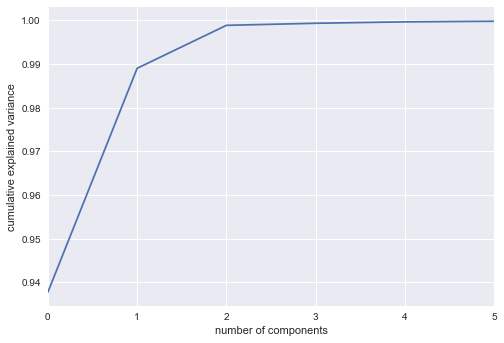

In [296]:
from sklearn.decomposition import PCA

pca = PCA().fit(Xtrain)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.xlim(0,5)

(0, 10)

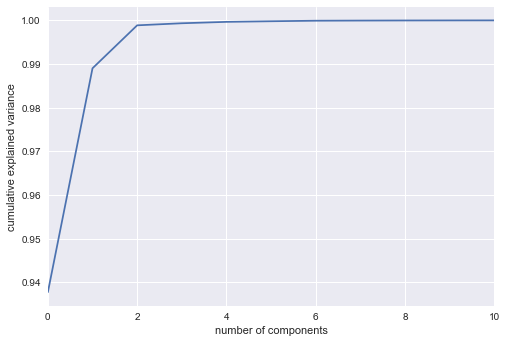

In [489]:
from sklearn.decomposition import RandomizedPCA

Rpca = PCA(svd_solver='randomized').fit(Xtrain)
plt.plot(np.cumsum(Rpca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.xlim(0,10)


In [490]:
pca = PCA(2)
Rpca = PCA(4, svd_solver='randomized')
projected = Rpca.fit_transform(Xtrain)
print(Xtrain.shape)
print(projected.shape)

(56, 557)
(56, 4)


In [491]:
Xtrain = projected

In [493]:
ytrain.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Label, dtype: object

In [99]:
ytrain_color = country_class_y['Label'].map({'Good':2, 'Neutral':1, 'Bad':0})

C:\Users\Gebruiker\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


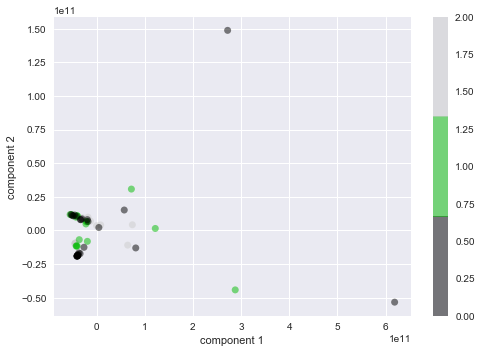

In [495]:
plt.scatter(projected[:, 0], projected[:, 1],
c= ytrain_color, edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('spectral', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [496]:
X_new = pca.inverse_transform(projected)
X_new.shape

AttributeError: 'PCA' object has no attribute 'components_'

In [498]:
(X_new > 324000).all(axis = 0).sum()

2

In [499]:
22, 532

(22, 532)

In [502]:
X_new.shape
56*557/(X_new > 1000000).sum()
Xtrain.shape

(56, 4)

#  RF

In [67]:
Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,866,867,868,869,870,871,872,873,874,875
France,100.0,5.771953,53.675508,293904.0,1.872929,16.414252,32.828504,33.562898,867.0,0.151292,...,27.682000,25.762857,-1.824084e+09,-1.286216e+20,0.599502,3264.025879,53349647.0,79.750,0.696309,2.208611
Sweden,100.0,1.518968,7.837403,32160.0,1.140894,1.588142,2.715723,6.565287,624.0,0.114215,...,12.695714,14.211238,1.362080e+09,4.405956e+19,0.332801,1403.287354,8513120.0,85.964,1.228561,2.576944
United Kingdom,100.0,1.229063,70.086389,169560.0,0.637613,8.544400,12.389380,23.680403,1220.0,0.227460,...,15.005333,29.047619,-2.999231e+09,1.413258e+20,1.195418,2897.067871,54370607.0,82.835,1.071327,4.214227
Cyprus,100.0,20.958084,18.073593,1670.0,3.134870,27.368795,0.213477,13.311688,498.0,0.332359,...,2.104000,18.896667,5.209919e+08,2.427678e+19,0.882732,81.478249,782112.0,66.840,0.663096,5.039833
Luxembourg,100.0,8.225388,49.806950,1290.0,0.400196,6.956363,0.069564,23.166023,934.0,0.244865,...,33.568190,33.568190,4.258135e+09,-5.557609e+18,0.000000,0.000000,527193.0,90.432,2.620957,0.000000


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import seaborn as sns; sns.set()

from sklearn.grid_search import GridSearchCV

Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xtrain, ytrain, random_state=0, test_size=0.75)
RF = RandomForestClassifier(random_state=0)


C:\Users\N552VX\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\N552VX\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [69]:
RF.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [72]:
param_grid_rf = {'n_estimators': [1, 10, 100, 1000, 2000, 5000, 7500]}
grid_rf = GridSearchCV(RF, param_grid_rf)


In [73]:
%time grid_rf.fit(Xtrain, ytrain)
print(grid_rf.best_params_)

Wall time: 1min 48s
{'n_estimators': 5000}


In [74]:
RF = grid_rf.best_estimator_


In [75]:
RF.fit(Xrf_train, yrf_train)
yrf_pred = RF.predict(Xrf_test)


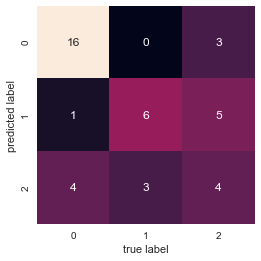

In [76]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(yrf_test, yrf_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [77]:
from sklearn import metrics
print(metrics.classification_report(yrf_pred, yrf_test))

             precision    recall  f1-score   support

        Bad       0.76      0.84      0.80        19
       Good       0.67      0.50      0.57        12
    Neutral       0.33      0.36      0.35        11

avg / total       0.62      0.62      0.62        42



In [78]:
from sklearn.cross_validation import cross_val_score
cross_val_score(RF, Xtrain, ytrain, cv=8).mean()

0.65773809523809512

#### Create feature matrix for the test countries

In [777]:
# create a df of countries not in CCPI results
df_rest = pd.DataFrame()
for country in sorted(set(wb['Country Name'])):
    # filter the non CCPI countries
    if country not in country_class_y['Country Name']:
        df1 = wb[wb['Country Name'] == country]
        # append to the df
        df_rest = pd.concat( [df_rest,df1], ignore_index=True, axis=0)


In [778]:
df_rest.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,Urban population (% of total),SP.URB.TOTL.IN.ZS,8.221000e+00,8.508000e+00,8.805000e+00,9.110000e+00,9.426000e+00,9.750000e+00,...,2.358700e+01,2.394600e+01,2.431300e+01,2.468900e+01,2.507400e+01,2.546800e+01,2.587100e+01,2.628200e+01,2.670300e+01,2.713200e+01
1,Afghanistan,AFG,Urban population,SP.URB.TOTL,7.395900e+05,7.799080e+05,8.229040e+05,8.685430e+05,9.172780e+05,9.689950e+05,...,6.278103e+06,6.535829e+06,6.808693e+06,7.111214e+06,7.449134e+06,7.817901e+06,8.209305e+06,8.609463e+06,9.008656e+06,9.402875e+06
2,Afghanistan,AFG,Urban population growth (annual %),SP.URB.GROW,5.256151e+00,5.307999e+00,5.366358e+00,5.397755e+00,5.459349e+00,5.484886e+00,...,4.250217e+00,4.023133e+00,4.090098e+00,4.347280e+00,4.642481e+00,4.831832e+00,4.885216e+00,4.759368e+00,4.532395e+00,4.282960e+00
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.661679e+07,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07
4,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,1.816077e+00,1.876528e+00,1.934999e+00,1.992521e+00,2.049423e+00,2.105369e+00,...,2.755225e+00,2.512574e+00,2.569114e+00,2.812617e+00,3.095119e+00,3.272703e+00,3.315224e+00,3.183201e+00,2.943234e+00,2.689163e+00


In [779]:
dict_df_rest_years = {}
for year in years:
    dict_df_rest_years[year] = df_rest[['Country Name','Indicator Name',year]]
    #dict_df_rest_years[year] = pd.merge(dict_df_rest_years[year], country_class_y, on="Country Name", how="outer" )
    
dict_df_rest_years[year].head()

,Country Name,Indicator Name,2015
0,Afghanistan,Urban population (% of total),2.670300e+01
1,Afghanistan,Urban population,9.008656e+06
2,Afghanistan,Urban population growth (annual %),4.532395e+00
3,Afghanistan,"Population, total",3.373649e+07
4,Afghanistan,Population growth (annual %),2.943234e+00


In [780]:
df_rest_test = {}

for year in years:
    df_rest_test[year] = pd.DataFrame()

    for indicator in wb_meta_indi['INDICATOR_NAME']:
        df_temp = pd.DataFrame()
        df_temp = dict_df_rest_years[year][(dict_df_rest_years[year]['Indicator Name'] == indicator)]

        # df_temp = df_temp.fillna(0)
        # df_temp.interpolate(method=’polynomial’, order=4)
        # print(len(df_temp))

        df_rest_test[year] = pd.concat([df_rest_test[year],df_temp], ignore_index=True, axis=0)
    print(df_rest_test[year].shape)

(19800, 3)
(19800, 3)
(19800, 3)
(19800, 3)
(19800, 3)
(19800, 3)
(19800, 3)
(19800, 3)
(19800, 3)
(19800, 3)
(19800, 3)


In [781]:
df_rest_test[year].head()

,Country Name,Indicator Name,2015
0,Afghanistan,Urban population (% of total),26.703
1,Albania,Urban population (% of total),57.407
2,Algeria,Urban population (% of total),70.727
3,American Samoa,Urban population (% of total),87.202
4,Andorra,Urban population (% of total),85.115


In [782]:
# nan for entire set of classes for one category is not included in the new cleaned df
df_rest_test_clean = {}
indi_sum = 0
countries_len = 264
for year in years:
    df_rest_test_clean[year] = pd.DataFrame()
    for indi in sorted(set_saved_indi_filter[year]):
        df_temp = df_rest_test[year][df_rest_test[year]['Indicator Name'] == indi]
        df_rest_test_clean[year] = pd.concat([df_rest_test_clean[year], df_temp], ignore_index = True, axis = 0)
    print(df_rest_test_clean[year].shape[0], '=', df_rest_test_clean[year].shape[0]/countries_len, 'x', countries_len)
    indi_sum += df_rest_test_clean[year].shape[0]/countries_len
    
print('total of saved indicator', indi_sum)

14520 = 55.0 x 264
13728 = 52.0 x 264
14520 = 55.0 x 264
14520 = 55.0 x 264
13992 = 53.0 x 264
16368 = 62.0 x 264
13728 = 52.0 x 264
14256 = 54.0 x 264
11352 = 43.0 x 264
12936 = 49.0 x 264
7128 = 27.0 x 264
total of saved indicator 557.0


In [783]:
df_rest_test_clean[year].head()

,Country Name,Indicator Name,2015
0,Afghanistan,"Agriculture, value added (% of GDP)",21.400722
1,Albania,"Agriculture, value added (% of GDP)",23.092629
2,Algeria,"Agriculture, value added (% of GDP)",12.669948
3,American Samoa,"Agriculture, value added (% of GDP)",NaN
4,Andorra,"Agriculture, value added (% of GDP)",NaN


In [784]:
ind = sorted(set(df_rest['Country Name']))
len(ind)

264

In [785]:
# reshape the matrix feature
countries_len = len(ind)
Xtest = pd.DataFrame()
Xdrest_year = {}

for year in years:    
    col = sorted(set_saved_indi_filter[year]) 
    features_len = len(set_saved_indi_filter[year])

    Xyear = pd.DataFrame(np.zeros(shape = (countries_len , features_len)), columns = col, index = ind)
    for country in ind:
        Xyear.loc[country] = df_rest_test_clean[year][df_rest_test_clean[year]['Country Name'] == country][year].values
    
    Xdyear[year] = Xyear
    Xtest = pd.concat([Xtest, Xyear], ignore_index = True, axis = 1) 


In [792]:
print(Xtest.shape)
Xtest.head()

(264, 557)


,0,1,2,3,4,5,6,7,8,9,...,547,548,549,550,551,552,553,554,555,556
Afghanistan,23.000000,5.840148,58.067580,379100.0,31.750991,11.955090,0.135968,0.046604,0.052341,1327.454,...,78.2,91.1,2.943234,13.738461,33736494.0,NaN,0.65171,9008656.0,26.703,4.532395
Albania,100.000000,NaN,39.306569,10770.0,21.234328,19.635036,0.458949,0.189289,0.237679,4253.720,...,94.9,14.0,-0.291206,NaN,2880703.0,106.367561,0.94666,1653725.0,57.407,1.462517
Algeria,98.184265,2.001893,17.302896,412110.0,8.228899,3.153577,0.754142,0.261537,0.293732,107278.085,...,84.3,25.5,1.919959,6.506177,39871528.0,105.799019,NaN,28199936.0,70.727,2.769061
American Samoa,NaN,NaN,25.000000,50.0,NaN,16.500000,NaN,NaN,NaN,NaN,...,100.0,NaN,0.180222,NaN,55537.0,NaN,NaN,48429.0,87.202,0.107431
Andorra,100.000000,NaN,41.914894,197.0,0.419197,5.319149,0.149839,NaN,NaN,575.719,...,100.0,2.8,-1.537836,NaN,78014.0,NaN,NaN,66402.0,85.115,-2.143956


In [829]:
Xrf_rest = Xtest.fillna(0) 
Xrf_rest.index.values

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacif

In [822]:
yrf_pred_rest = RF.predict(Xrf_rest)
list(yrf_pred_rest)

['Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Neutral',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Neutral',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Neutral',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Neutral',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Neutral',
 'Good',
 'Good',
 'Neutral',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Neutral',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Neutral',
 'Neutral',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Neutral',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Neutral',
 'Bad',
 'Bad',
 '

In [821]:
ind

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD coun

In [832]:
pd.DataFrame(yrf_pred_rest, index = list(Xrf_rest.index.values), columns = ['Class'])

,Class
Afghanistan,Good
Albania,Good
Algeria,Bad
American Samoa,Good
Andorra,Good
Angola,Good
Antigua and Barbuda,Good
Arab World,Bad
Argentina,Neutral
Armenia,Good


#  SVM

In [79]:
# apply the ML algorithm here
from sklearn.svm import SVC
svc = SVC(kernel='rbf', class_weight='balanced')

In [80]:
svc.get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [82]:
from sklearn.grid_search import GridSearchCV
param_grid_svc = {'C': [0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 'gamma': [1E-40, 1E-30, 1E-25, 1E-20 , 1E-15, 1E-12, 1E-10, 0.00001]}
grid_svc = GridSearchCV(svc, param_grid_svc)

%time grid_svc.fit(Xtrain, ytrain)
print(grid_svc.best_params_)

Wall time: 1.73 s
{'C': 1, 'gamma': 1e-30}


In [83]:
svc = grid_svc.best_estimator_

In [84]:
from sklearn.cross_validation import cross_val_score
cross_val_score(svc, Xtrain, ytrain, cv=4)

array([ 0.46666667,  0.5       ,  0.5       ,  0.46153846])

In [85]:
# apply the ML algorithm here
from sklearn.svm import SVC
svc_sig = SVC(kernel='sigmoid')

svc_sig.get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [90]:
param_grid_svcsig = {'C': [0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 'gamma': [1E-50, 1E-45, 1E-40, 1E-30, 1E-25, 1E-20 , 1E-15, 1E-12, 1E-10, 0.00001], 'coef0': [-10,-7, -5, -3, -2 , -1,  0, 1, 2]}

In [92]:
grid_svcsig = GridSearchCV(svc_sig, param_grid_svcsig)

%time grid_svcsig.fit(Xtrain, ytrain)
print(grid_svcsig.best_params_)

Wall time: 16.1 s
{'C': 5, 'coef0': -2, 'gamma': 1e-45}


In [93]:
model_svcsig = grid_svcsig.best_estimator_

In [94]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model_svcsig, Xtrain, ytrain, cv=4)



array([ 0.6       ,  0.5       ,  0.57142857,  0.61538462])

#### KMEANS

In [95]:
Xtrain.shape

(56, 876)

In [96]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xtrain)
y_kmeans = kmeans.predict(Xtrain)

In [97]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [100]:
ytrain_color.values

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_kmeans, ytrain_color.values)

0.44642857142857145

In [102]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain_color.values,
s=50, cmap='viridis');

TypeError: unhashable type: 'slice'